In [3]:
# 신용카드를 사용하고 갚지 않는 문제를 가지고 있는 사람을 잡는 것 
import numpy as np
import pandas as pd
data=pd.read_csv("../../../creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data=data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


#### Data - Credit Card Fraud Detection Data
1. 28개의 컬럼으로 구성
2. 타겟변수는 Class (0, 1 ; 이진분류)

In [5]:
# 데이터 내 NA값 여부 확인
data.isnull().any() # 만약 존재한다면 0으로 대체 혹은, 해당 열을 제외하고 진행

V1       False
V2       False
V3       False
V4       False
V5       False
V6       False
V7       False
V8       False
V9       False
V10      False
V11      False
V12      False
V13      False
V14      False
V15      False
V16      False
V17      False
V18      False
V19      False
V20      False
V21      False
V22      False
V23      False
V24      False
V25      False
V26      False
V27      False
V28      False
Class    False
dtype: bool

In [6]:
print("Credit Card Fraud Detection data -  rows:",data.shape[0]," columns:", data.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 29


In [7]:
data.describe() # 요약 통계량

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,...,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


In [9]:
# 종속 변수의 분포 확인
# class imbalance
from collections import Counter
Counter(data.Class)

Counter({0: 284315, 1: 492})

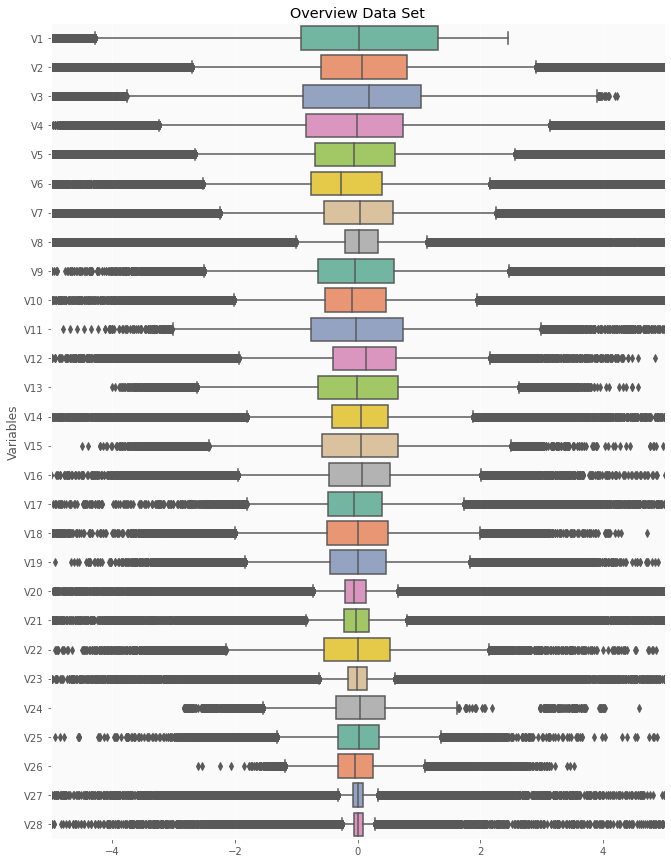

In [11]:
# EDA - 데이터 분포 확인가능
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# plot을 구글링을 해서 코드를 사용 
# 블로그나 깃헙에 붙여넣어두기 
# 자주 쓰는것 블로그 비공개 포스팅, 혹은 깃헙 비공개용으로 올려서 사용

plt.style.use('ggplot') # Using ggplot2 style visuals 
f, ax = plt.subplots(figsize = (11, 15)) # 그래프 사이즈

ax.set_facecolor('#fafafa') # 그래프 색상값
ax.set(xlim = (-5, 5)) # X축 범위
plt.ylabel('Variables') # Y축 이름
plt.title("Overview Data Set") # 그래프 제목
ax = sns.boxplot(data = data.drop(columns = ['Class']), # V1 ~ V28 확인
                 orient = 'h', 
                 palette = 'Set2')

<Figure size 432x288 with 0 Axes>

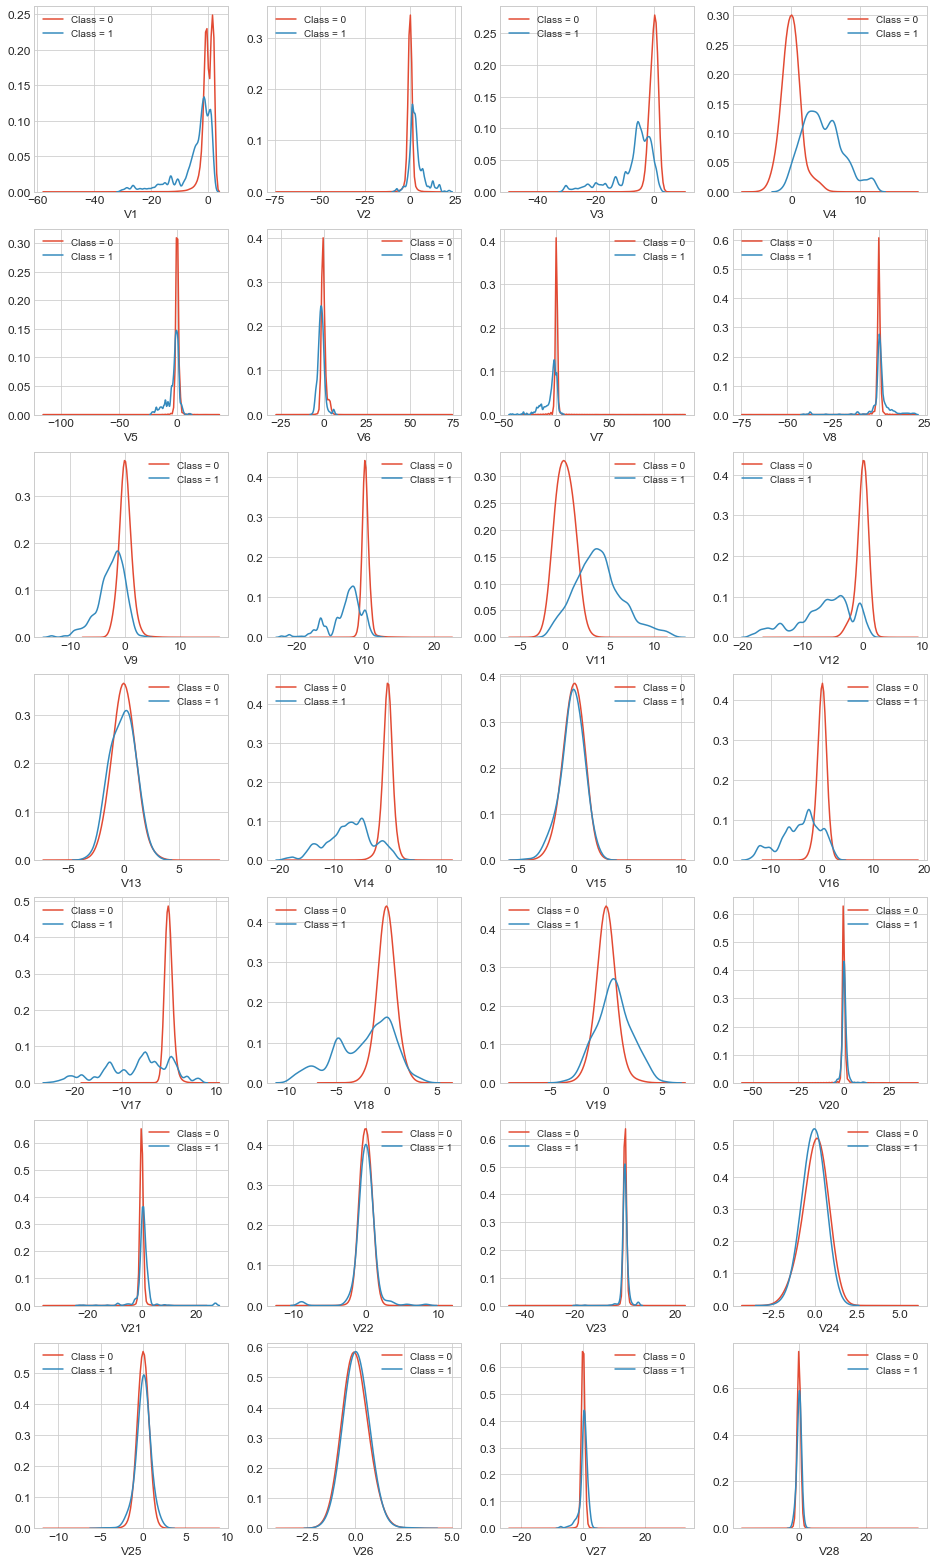

In [8]:
# class1 의 데이터 양이 충분히 많이 뽑아내지 않아서 완벽하게 예측을 하기는 어렵다 
var = data.columns.values[:-1] # V1 ~ V28
i = 0
t0 = data.loc[data['Class'] == 0] # Class : 0 인 행만 추출
t1 = data.loc[data['Class'] == 1] # Class : 1 인 행만 추출

sns.set_style('whitegrid') # 그래프 스타일 지정
plt.figure()
fig, ax = plt.subplots(8, 4, figsize = (16, 28)) # 축 지정

for feature in var:
    i += 1
    plt.subplot(7, 4, i) # 28개의 그래프
    sns.kdeplot(t0[feature], bw = 0.5, label = "Class = 0")
    sns.kdeplot(t1[feature], bw = 0.5, label = "Class = 1")
    plt.xlabel(feature, fontsize = 12) # 라벨 속성값
    locs, labels = plt.xticks()
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.show();

#### 각 변수 별 그래프를 타겟변수에 대해서 그려보았을 떄 차이가 있는 변수들은 다음과 같이 정의할 수 있다.
- 1) 타겟 변수에 대해 분포 차이가 많이 나는 변수 : V4, V11
- 2) 타겟 변수에 대해 분포 차이가 비교적 많이 존재하는 변수 : V12, V14, V18
- 3) 타겟 변수에 대해 분포 차이가 비교적 적게 존재하는 변수 : V1, V2, V3, V10

In [12]:
X = np.array(data.iloc[:, data.columns != 'Class'])
y = np.array(data.iloc[:, data.columns == 'Class'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

# a = 1에 넣는것 
# a != 1 과 같지 않니라고 물어보는 것 
# a == 1 와 같냐고 물어보는 것 
# 행은 전부 가져와! 


Shape of X: (284807, 28)
Shape of y: (284807, 1)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (227845, 28)
Number transactions y_train dataset:  (227845, 1)
Number transactions X_test dataset:  (56962, 28)
Number transactions y_test dataset:  (56962, 1)


In [14]:
# confusion matrix를 만들고 안에 있는 정보를 가지고 만듦 

def model_evaluation(label, predict):
    cf_matrix = confusion_matrix(label, predict)
    Accuracy = (cf_matrix[0][0] + cf_matrix[1][1]) / sum(sum(cf_matrix))
    Precision = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[0][1])
    Recall = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[1][0])
    F1_Score = (2 * Recall * Precision) / (Recall + Precision)
    print("Model_Evaluation with Label:1")
    print("Accuracy: ", Accuracy)
    print("Precision: ", Precision)
    print("Recall: ", Recall)
    print("F1-Score: ", F1_Score)

# Light GBM을 기본 모델로 설정

In [15]:
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
lgb_dtrain = lgb.Dataset(data = pd.DataFrame(X_train), label = pd.DataFrame(y_train)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_train))) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = np.argmax(lgb_model.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(y_test, lgb_model_predict) # 모델 분류 결과 평가

/Users/kimjuwon/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 28
[LightGBM] [Info] Start training from score -0.001718
[LightGBM] [Info] Start training from score -6.367713
Model_Evaluation with Label:1
Accuracy:  0.9991748885221726
Precision:  0.921875
Recall:  0.5841584158415841
F1-Score:  0.7151515151515151


In [16]:
lgb_model.predict(X_test)

array([[0.99889325, 0.00110675],
       [0.99891568, 0.00108432],
       [0.99538877, 0.00461123],
       ...,
       [0.99891568, 0.00108432],
       [0.99891568, 0.00108432],
       [0.99891568, 0.00108432]])

In [17]:
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
lgb_dtrain = lgb.Dataset(data = pd.DataFrame(X_train), label = pd.DataFrame(y_train)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'binary'} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
pred= np.repeat(0, len(y_test))
pred[lgb_model.predict(X_test) >0.5] =1
model_evaluation(y_test, pred)


/Users/kimjuwon/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 391, number of negative: 227454
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014844 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001716 -> initscore=-6.365996
[LightGBM] [Info] Start training from score -6.365996
Model_Evaluation with Label:1
Accuracy:  0.9991748885221726
Precision:  0.921875
Recall:  0.5841584158415841
F1-Score:  0.7151515151515151


# SMOTE을 이용해서 Oversampling을 진행해보자!

In [18]:
# 기존의 X_train, y_train, X_test, y_test의 형태 확인
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (227845, 28)
Number transactions y_train dataset:  (227845, 1)
Number transactions X_test dataset:  (56962, 28)
Number transactions y_test dataset:  (56962, 1)


In [23]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) # y_train 중 레이블 값이 1인 데이터의 개수
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) # y_train 중 레이블 값이 0 인 데이터의 개수

#30 퍼센트로 증가 시켜라 
sm = SMOTE(random_state = 42, sampling_strategy = 0.3) # SMOTE 알고리즘, 비율 증가
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) # Over Sampling 진행

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

# sampling_strategy가 차이가 많이남, 30퍼센트를 의미 

Before OverSampling, counts of label '1': [391]
Before OverSampling, counts of label '0': [227454] 

After OverSampling, counts of label '1': 68236
After OverSampling, counts of label '0': 227454


In [24]:
print("Before OverSampling, the shape of X_train: {}".format(X_train.shape)) # SMOTE 적용 이전 데이터 형태
print("Before OverSampling, the shape of y_train: {}".format(y_train.shape)) # SMOTE 적용 이전 데이터 형태
print('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape)) # SMOTE 적용 결과 확인
print('After OverSampling, the shape of y_train: {}'.format(y_train_res.shape)) # # SMOTE 적용 결과 확인

Before OverSampling, the shape of X_train: (227845, 28)
Before OverSampling, the shape of y_train: (227845, 1)
After OverSampling, the shape of X_train: (295690, 28)
After OverSampling, the shape of y_train: (295690,)


In [25]:
lgb_dtrain2 = lgb.Dataset(data = pd.DataFrame(X_train_res), label = pd.DataFrame(y_train_res)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param2 = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_train_res))) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model2 = lgb.train(params = lgb_param2, train_set = lgb_dtrain2) # 학습 진행
lgb_model2_predict = np.argmax(lgb_model2.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(y_test, lgb_model2_predict) # 모델 분류 평가 결과

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/Users/kimjuwon/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016838 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 295690, number of used features: 28
[LightGBM] [Info] Start training from score -0.262364
[LightGBM] [Info] Start training from score -1.466339
Model_Evaluation with Label:1
Accuracy:  0.9990695551420246
Precision:  0.6967213114754098
Recall:  0.8415841584158416
F1-Score:  0.7623318385650223


# 그렇다면, Oversampling을 더 많이 해보자.

In [27]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) # y_train 중 레이블 값이 1인 데이터의 개수
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) # y_train 중 레이블 값이 0 인 데이터의 개수

sm2 = SMOTE(random_state = 42, sampling_strategy = 0.6) # SMOTE 알고리즘, 비율 60%
X_train_res2, y_train_res2 = sm2.fit_resample(X_train, y_train.ravel()) # Over Sampling 진행

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res2==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res2==0)))

Before OverSampling, counts of label '1': [391]
Before OverSampling, counts of label '0': [227454] 

After OverSampling, counts of label '1': 136472
After OverSampling, counts of label '0': 227454


In [28]:
lgb_dtrain3 = lgb.Dataset(data = pd.DataFrame(X_train_res2), label = pd.DataFrame(y_train_res2)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param3 = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_train_res2))) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model3 = lgb.train(params = lgb_param3, train_set = lgb_dtrain3) # 학습 진행
lgb_model3_predict = np.argmax(lgb_model3.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(y_test, lgb_model3_predict) # 모델 분류 평가 결과

/Users/kimjuwon/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024795 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 363926, number of used features: 28
[LightGBM] [Info] Start training from score -0.470003
[LightGBM] [Info] Start training from score -0.980831
Model_Evaluation with Label:1
Accuracy:  0.99626066500474
Precision:  0.3055555555555556
Recall:  0.8712871287128713
F1-Score:  0.45244215938303345


# 아예, 1:1 비율로 Oversampling을 해보자.

In [30]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) # y_train 중 레이블 값이 1인 데이터의 개수
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) # y_train 중 레이블 값이 0 인 데이터의 개수

sm3 = SMOTE(random_state = 42) # SMOTE 알고리즘, Default: 동등
X_train_res3, y_train_res3 = sm3.fit_resample(X_train, y_train.ravel()) # Over Sampling 진행

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res3==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res3==0)))

Before OverSampling, counts of label '1': [391]
Before OverSampling, counts of label '0': [227454] 

After OverSampling, counts of label '1': 227454
After OverSampling, counts of label '0': 227454


In [31]:
lgb_dtrain4 = lgb.Dataset(data = pd.DataFrame(X_train_res3), label = pd.DataFrame(y_train_res3)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param4 = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_train_res3))) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model4 = lgb.train(params = lgb_param4, train_set = lgb_dtrain4) # 학습 진행
lgb_model4_predict = np.argmax(lgb_model4.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(y_test, lgb_model4_predict) # 모델 분류 평가 결과

/Users/kimjuwon/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023909 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 454908, number of used features: 28
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -0.693147
Model_Evaluation with Label:1
Accuracy:  0.9835855482602437
Precision:  0.08794466403162056
Recall:  0.8811881188118812
F1-Score:  0.15992812219227312


## 비율이 30%가 적당하다. 그럼 BLSM과 비교해보자!

In [34]:
# BLSM (Borderline SMOTE)
from imblearn.over_sampling import BorderlineSMOTE
sm4 = BorderlineSMOTE(random_state = 42, sampling_strategy = 0.6) # BLSM 알고리즘 적용
X_train_res4, y_train_res4 = sm4.fit_resample(X_train, y_train.ravel()) # Over Sampling 적용

In [35]:
# 항상 같은게 아님 
# 항상 BLSM이 좋은 것은 아님 
# 알고있는것과 다른 경우가 꽤 존재. 많이 쓰는 데이터에 대한 결과 
# 논문이 나올때 데이터에 피팅된 경우가 많음
# 항상 올바르지 않음
# 많은 경우 테스트 해보기 

lgb_dtrain5 = lgb.Dataset(data = pd.DataFrame(X_train_res4), label = pd.DataFrame(y_train_res4)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param5 = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_train_res4))) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model5 = lgb.train(params = lgb_param5, train_set = lgb_dtrain5) # 학습 진행
lgb_model5_predict = np.argmax(lgb_model5.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(y_test, lgb_model5_predict) # 모델 분류 평가 결과

/Users/kimjuwon/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 363926, number of used features: 28
[LightGBM] [Info] Start training from score -0.470003
[LightGBM] [Info] Start training from score -0.980831
Model_Evaluation with Label:1
Accuracy:  0.9976299989466662
Precision:  0.4158415841584158
Recall:  0.8316831683168316
F1-Score:  0.5544554455445544


# BLSM보다 기본 SMOTE가 성능이 좋다. 이를 바탕으로 다양한 모델에 적용
- 선형회귀(로지스틱), Random Forest, CatBoost

In [38]:
# BLSM을 이용해서 Oversampling 한 학습 데이터 셋 : X_train_res2, y_train_res2
# lasso를 보면 선형회귀는 맞지 않겠구나 ....!를 깨달아야함 
# 데이터가 비선형적인 관계를 가지고 있기 때문에

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C = 1e+10) 
# sklearn 의 Logistic Regression은 기본적으로 Ridge 정규화가 포함되어 있기 때문에, 
# 정규화 텀을 억제하는 C를 크게 적용한다 (C:Inverse of regularization strength)
lr_model.fit(X_train_res, y_train_res) # 로지스틱 회귀 모형 학습
lr_predict = lr_model.predict(X_test) # 학습 결과를 바탕으로 검증 데이터를 예측
model_evaluation(y_test, lr_predict) # 모델 분류 평가 결과

Model_Evaluation with Label:1
Accuracy:  0.992451107756048
Precision:  0.1780821917808219
Recall:  0.900990099009901
F1-Score:  0.2973856209150327


In [39]:
np.sum(lr_predict==1)

511

In [41]:
# 라쏘 로지스틱 회귀모형 학습
lasso_model = LogisticRegression(penalty = 'l1', solver='liblinear') # Penalty = l1 Regularizer, C = 1.0 (Default))
lasso_model.fit(X_train_res, y_train_res) # 라쏘 로지스틱 회귀 모형 학습
lasso_predict = lasso_model.predict(X_test) # 학습 결과를 바탕으로 검증 데이터를 예측
model_evaluation(y_test, lasso_predict) # 모델 분류 평가 결과

Model_Evaluation with Label:1
Accuracy:  0.992451107756048
Precision:  0.1780821917808219
Recall:  0.900990099009901
F1-Score:  0.2973856209150327


In [42]:
np.sum(lasso_predict==1)


511

In [43]:
# 릿지 로지스틱 회귀모형 학습
ridge_model = LogisticRegression(penalty = 'l2') # Default = LogisticRegression()
ridge_model.fit(X_train_res, y_train_res) # 릿지 로지스틱 회귀 모형 학습
ridge_predict = ridge_model.predict(X_test) # 학습 결과를 바탕으로 검증 데이터를 예측
model_evaluation(y_test, ridge_predict) # 모델 분류 평가 결과

Model_Evaluation with Label:1
Accuracy:  0.992451107756048
Precision:  0.1780821917808219
Recall:  0.900990099009901
F1-Score:  0.2973856209150327


In [44]:
np.sum(ridge_predict==1)

511

In [45]:
# 여러번 시행해보고 어떤 모델의 성능이 제일 높게 나오는지 확인해보고 해당하는 것을 선택
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators = 50, # 50번 추정
                                             max_depth = 10, # 트리 최대 깊이 10
                                             random_state = 42) # 시드값 고정
rf_model = random_forest_model.fit(X_train_res, y_train_res) # 학습 진행
rf_predict = rf_model.predict(X_test) # 평가 데이터 예측
model_evaluation(y_test, rf_predict) # 모델 분류 평가 결과

Model_Evaluation with Label:1
Accuracy:  0.9991748885221726
Precision:  0.7288135593220338
Recall:  0.8514851485148515
F1-Score:  0.7853881278538813


In [46]:
import catboost as cb
cb_dtrain = cb.Pool(data = X_train_res, label = y_train_res) # 학습 데이터를 Catboost 모델에 맞게 변환
cb_param = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'eval_metric': 'Accuracy', # 평가 척도
            'loss_function': 'MultiClass'} # 손실 함수, 목적 함수
cb_model = cb.train(pool = cb_dtrain, params = cb_param) # 학습 진행
cb_model_predict = np.argmax(cb_model.predict(X_test), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측, 인덱스의 순서를 맞추기 위해 +1
model_evaluation(y_test, cb_model_predict) # 모델 분류 평가 결과

0:	learn: 0.9694748	total: 226ms	remaining: 11.1s
1:	learn: 0.9711218	total: 369ms	remaining: 8.86s
2:	learn: 0.9712368	total: 574ms	remaining: 8.99s
3:	learn: 0.9719267	total: 811ms	remaining: 9.33s
4:	learn: 0.9719740	total: 1.01s	remaining: 9.11s
5:	learn: 0.9719301	total: 1.24s	remaining: 9.09s
6:	learn: 0.9717610	total: 1.41s	remaining: 8.66s
7:	learn: 0.9721025	total: 1.58s	remaining: 8.3s
8:	learn: 0.9721296	total: 1.75s	remaining: 7.98s
9:	learn: 0.9720552	total: 1.93s	remaining: 7.72s
10:	learn: 0.9722818	total: 2.11s	remaining: 7.5s
11:	learn: 0.9722243	total: 2.29s	remaining: 7.25s
12:	learn: 0.9720484	total: 2.46s	remaining: 6.99s
13:	learn: 0.9721634	total: 2.63s	remaining: 6.76s
14:	learn: 0.9722175	total: 2.79s	remaining: 6.5s
15:	learn: 0.9721161	total: 2.95s	remaining: 6.26s
16:	learn: 0.9720992	total: 3.11s	remaining: 6.04s
17:	learn: 0.9722243	total: 3.25s	remaining: 5.78s
18:	learn: 0.9721905	total: 3.38s	remaining: 5.52s
19:	learn: 0.9721803	total: 3.51s	remaining:

# Ensemble의 Ensemble
- 성능이 가장 좋은 Random Forest 모델을 바탕으로 진행

In [50]:
import random
bagging_predict_result = [] # 빈 리스트 생성
number_of_bagging = 5 # Bagging 횟수
for _ in range(number_of_bagging):
    data_index = [data_index for data_index in range(X_train_res.shape[0])] # 학습 데이터의 인덱스를 리스트로 변환
    random_data_index = np.random.choice(data_index, X_train_res.shape[0]) # 복원추출을 의미 
    random_forest_model2 = RandomForestClassifier(n_estimators = 50, # 50번 추정
                                                 max_depth = 10, # 트리 최대 깊이 10
                                                 random_state = 42) # 시드값 고정
    rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],
                                       y = pd.DataFrame(y_train_res).iloc[random_data_index]) # 학습 진행
    rf_predict2 = rf_model2.predict(X_test) # 평가 데이터 예측
    bagging_predict_result.append(rf_predict2) # 예측 결과를 bagging_predict_result에 저장
    print(_+1, "Model Evaluation Result:", "\n") # 전체적인 성능 평가
    model_evaluation(y_test, rf_predict2) # 모델 분류 평가 결과

/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_88874/4007186221.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],


1 Model Evaluation Result: 

Model_Evaluation with Label:1
Accuracy:  0.9991924440855307
Precision:  0.7350427350427351
Recall:  0.8514851485148515
F1-Score:  0.7889908256880734


/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_88874/4007186221.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],


2 Model Evaluation Result: 

Model_Evaluation with Label:1
Accuracy:  0.9992099996488887
Precision:  0.7413793103448276
Recall:  0.8514851485148515
F1-Score:  0.792626728110599


/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_88874/4007186221.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],


3 Model Evaluation Result: 

Model_Evaluation with Label:1
Accuracy:  0.9992977774656788
Precision:  0.7699115044247787
Recall:  0.8613861386138614
F1-Score:  0.8130841121495327


/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_88874/4007186221.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],


4 Model Evaluation Result: 

Model_Evaluation with Label:1
Accuracy:  0.9992275552122467
Precision:  0.7478260869565218
Recall:  0.8514851485148515
F1-Score:  0.7962962962962963


/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_88874/4007186221.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],


5 Model Evaluation Result: 

Model_Evaluation with Label:1
Accuracy:  0.9991748885221726
Precision:  0.7327586206896551
Recall:  0.8415841584158416
F1-Score:  0.7834101382488479


# Bagging을 바탕으로 예측한 결과값에 대해 다수결로 예측

In [51]:
bagging_predict = [] # 빈 리스트 생성
for lst2_index in range(X_test.shape[0]): # 테스트 데이터 개수만큼 반복
    temp_predict = [] # 반복문 내 임시 빈 리스트 생성
    for lst_index in range(len(bagging_predict_result)): # Bagging 결과 리스트 개수 만큼 반복
        temp_predict.append(bagging_predict_result[lst_index][lst2_index]) # 각 Bagging 결과 예측한 값 중 같은 인덱스를 리스트에 저장
    if np.mean(temp_predict) >= 0.5: # 0, 1 이진분류이므로, 예측값의 평균이 0.5보다 크면 1, 아니면 0으로 예측 다수결)
        bagging_predict.append(1)
    elif np.mean(temp_predict) < 0.5: # 예측값의 평균이 0.5보다 낮으면 0으로 결과 저장
        bagging_predict.append(0)
model_evaluation(y_test, bagging_predict) # 모델 분류 평가 결과

Model_Evaluation with Label:1
Accuracy:  0.9992451107756047
Precision:  0.7543859649122807
Recall:  0.8514851485148515
F1-Score:  0.8


In [52]:
rf_model2.predict(X_test) 

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
rf_model2.predict_proba(X_test)[:,1] 

array([0.06912657, 0.03096096, 0.05346231, ..., 0.01346813, 0.02046453,
       0.0062699 ])

In [54]:
import random
bagging_predict_result = 0 
number_of_bagging = 5 # Bagging 횟수
for i in range(number_of_bagging):
    data_index = [data_index for data_index in range(X_train_res.shape[0])] # 학습 데이터의 인덱스를 리스트로 변환
    random_data_index = np.random.choice(data_index, X_train_res.shape[0])  
    random_forest_model2 = RandomForestClassifier(n_estimators = 50, # 50번 추정
                                                 max_depth = 10, # 트리 최대 깊이 10
                                                 random_state = 42) # 시드값 고정
    rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],
                                       y = pd.DataFrame(y_train_res).iloc[random_data_index]) # 학습 진행
    rf_predict2 = rf_model2.predict_proba(X_test)[: , 1]
    bagging_predict_result=bagging_predict_result+(rf_predict2) # 예측 결과를 bagging_predict_result에 저장
    print(i)

/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_88874/1681420969.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],


0


/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_88874/1681420969.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],


1


/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_88874/1681420969.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],


2


/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_88874/1681420969.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],


3


/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_88874/1681420969.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],


4


In [55]:
pred= np.repeat(0,len(y_test))
pred[bagging_predict_result /2 > 0.5]=1
model_evaluation(y_test, pred) # 모델 분류 평가 결과

Model_Evaluation with Label:1
Accuracy:  0.9935746638109617
Precision:  0.20090293453724606
Recall:  0.8811881188118812
F1-Score:  0.3272058823529412


In [56]:
pred= np.repeat(0,len(y_test))
pred[bagging_predict_result /2 > 0.5]=1
model_evaluation(y_test, pred) # 모델 분류 평가 결과

Model_Evaluation with Label:1
Accuracy:  0.9935746638109617
Precision:  0.20090293453724606
Recall:  0.8811881188118812
F1-Score:  0.3272058823529412


In [57]:
def cut_off(y,threshold):
    Y =y.copy()
    Y[Y >threshold]=1
    Y[Y <=threshold]=0
    return(Y.astype(int))

In [58]:
threshold = np.arange(0,1,0.1)

In [59]:
threshold

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [60]:
for i in threshold :
    pred_y = cut_off(bagging_predict_result /2 ,i)
    print(i)
    model_evaluation(y_test, pred_y)

0.0
Model_Evaluation with Label:1
Accuracy:  0.001773111899160844
Precision:  0.001773111899160844
Recall:  1.0
F1-Score:  0.003539947076038764
0.1
Model_Evaluation with Label:1
Accuracy:  0.8691232751659
Precision:  0.012980132450331127
Recall:  0.9702970297029703
F1-Score:  0.02561756633119854
0.2
Model_Evaluation with Label:1
Accuracy:  0.9522839787928795
Precision:  0.03483825097760398
Recall:  0.9702970297029703
F1-Score:  0.06726149622512011
0.30000000000000004
Model_Evaluation with Label:1
Accuracy:  0.9780379902391068
Precision:  0.06961077844311377
Recall:  0.9207920792079208
F1-Score:  0.12943632567849683
0.4
Model_Evaluation with Label:1
Accuracy:  0.9879393279730346
Precision:  0.11948051948051948
Recall:  0.9108910891089109
F1-Score:  0.21125143513203215
0.5
Model_Evaluation with Label:1
Accuracy:  0.9935746638109617
Precision:  0.20090293453724606
Recall:  0.8811881188118812
F1-Score:  0.3272058823529412
0.6000000000000001
Model_Evaluation with Label:1
Accuracy:  0.996278

In [61]:
p_list=np.repeat(1/X_train_res.shape[0],X_train_res.shape[0])
p_list[rf_model2.predict(X_train_res) != y_train_res]=p_list[rf_model2.predict(X_train_res) != y_train_res]*2

In [62]:
p_list[rf_model2.predict(X_train_res) != y_train_res]

array([6.76384051e-06, 6.76384051e-06, 6.76384051e-06, ...,
       6.76384051e-06, 6.76384051e-06, 6.76384051e-06])

In [63]:
p_list=p_list/sum(p_list)

In [64]:
sum(p_list)

0.9999999999979965

In [65]:
# for문을 이용하면 코드를 원하는 방향으로 코드를 바꿔줄 수 있다. 
import random
bagging_predict_result = 0 # 
number_of_bagging = 5 # Bagging 횟수
for i in range(number_of_bagging):
    data_index = [data_index for data_index in range(X_train_res.shape[0])] # 학습 데이터의 인덱스를 리스트로 변환
    if i ==0 : 
        plist= np.repeat(1/X_train_res.shape[0],X_train_res.shape[0])
    else :
        p_list=np.repeat(1/X_train_res.shape[0],X_train_res.shape[0])
        p_list[rf_model2.predict(X_train_res) != y_train_res]=p_list[rf_model2.predict(X_train_res) != y_train_res]*2
    random_data_index = np.random.choice(data_index, X_train_res.shape[0],p=plist) # 
    random_forest_model2 = RandomForestClassifier(n_estimators = 50, # 50번 추정
                                                 max_depth = 10, # 트리 최대 깊이 10
                                                 random_state = 42) # 시드값 고정
    rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],
                                       y = pd.DataFrame(y_train_res).iloc[random_data_index]) # 학습 진행
    rf_predict2 = rf_model2.predict_proba(X_test)[: , 1]
    bagging_predict_result=bagging_predict_result+(rf_predict2) # 예측 결과를 bagging_predict_result에 저장
    print(i)

/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_88874/1631058998.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],


0


/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_88874/1631058998.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],


1


/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_88874/1631058998.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],


2


/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_88874/1631058998.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],


3


/var/folders/ny/2kfd2px527g1pqq7b25smqgr0000gn/T/ipykernel_88874/1631058998.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model2 = random_forest_model2.fit(X = pd.DataFrame(X_train_res).iloc[random_data_index, ],


4


In [66]:
for i in threshold :
    pred_y = cut_off(bagging_predict_result /2 ,i)
    print(i)
    model_evaluation(y_test, pred_y)

0.0
Model_Evaluation with Label:1
Accuracy:  0.001773111899160844
Precision:  0.001773111899160844
Recall:  1.0
F1-Score:  0.003539947076038764
0.1
Model_Evaluation with Label:1
Accuracy:  0.8655770513675783
Precision:  0.012641898864809082
Recall:  0.9702970297029703
F1-Score:  0.024958614542213167
0.2
Model_Evaluation with Label:1
Accuracy:  0.9492819774586566
Precision:  0.032214765100671144
Recall:  0.9504950495049505
F1-Score:  0.06231742940603701
0.30000000000000004
Model_Evaluation with Label:1
Accuracy:  0.9777571012253783
Precision:  0.06942392909896603
Recall:  0.9306930693069307
F1-Score:  0.12920962199312713
0.4
Model_Evaluation with Label:1
Accuracy:  0.9878515501562445
Precision:  0.11870967741935484
Recall:  0.9108910891089109
F1-Score:  0.2100456621004566
0.5
Model_Evaluation with Label:1
Accuracy:  0.9936975527544679
Precision:  0.2054794520547945
Recall:  0.8910891089108911
F1-Score:  0.3339517625231911
0.6000000000000001
Model_Evaluation with Label:1
Accuracy:  0.996